In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
from scipy import stats


from pprint import pprint
import sys
from colorama import Style, Fore

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "malgun gothic",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

plt.rc('axes', unicode_minus=False)

sns.set(rc=rc)


red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

In [3]:
from sklearn.datasets import load_iris,make_classification
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target

columns = iris.feature_names

df = pd.DataFrame(X,columns = columns)

df['target']= y


In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


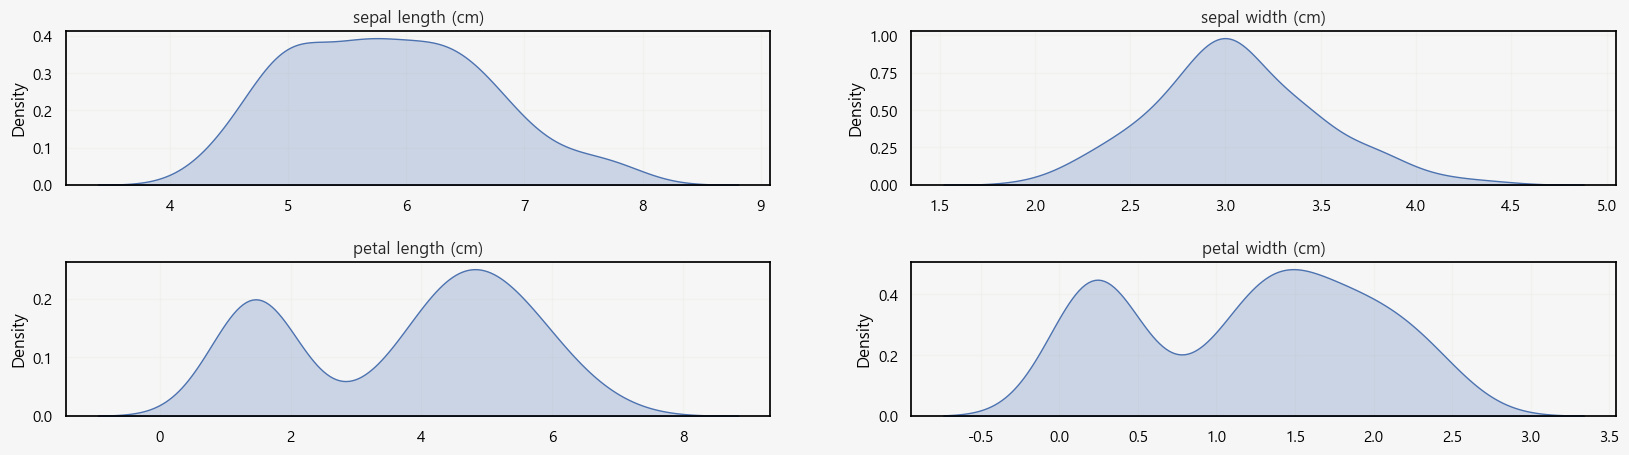

In [33]:
cols = df.columns[:-1]

fig,ax = plt.subplots(ncols = 2,nrows = 2 , figsize = (20,5))
ax = ax.flatten()

fig.subplots_adjust(hspace = 0.5)
for i,col in enumerate(cols):
    
    sns.kdeplot(data = df,
                x  = col,
                fill = True,
                ax = ax[i])
    ax[i].set_xlabel('')
    ax[i].set_title(col)
    

##### **가우시안NB는 모든 데이터가 정규 분포를 따른다고 가정을 한다**

* 정규분포를  따르는지 확인하기 위해 확인해야 할 것들을 확인해보자

In [6]:
def is_normal_distribution(data):
    
    result = pd.DataFrame()
    
    result['mean'] = data.mean().values
    result['std'] = data.std().values 
    result['skew'] = data.skew().values
    result['kurtosis'] = data.kurtosis().values
    
    result['p_value'] = [stats.shapiro(data[col])[1] for col in data.columns]
    
    
    result = result.set_index(data.columns)
    
    display(result)

In [7]:
is_normal_distribution(df.iloc[:,:-1])

,mean,std,skew,kurtosis,p_value
sepal length (cm),5.843333,0.828066,0.314911,-0.552064,1.018027e-02
sepal width (cm),3.057333,0.435866,0.318966,0.228249,1.011265e-01
petal length (cm),3.758000,1.765298,-0.274884,-1.402103,7.412652e-10
petal width (cm),1.199333,0.762238,-0.102967,-1.340604,1.680264e-08


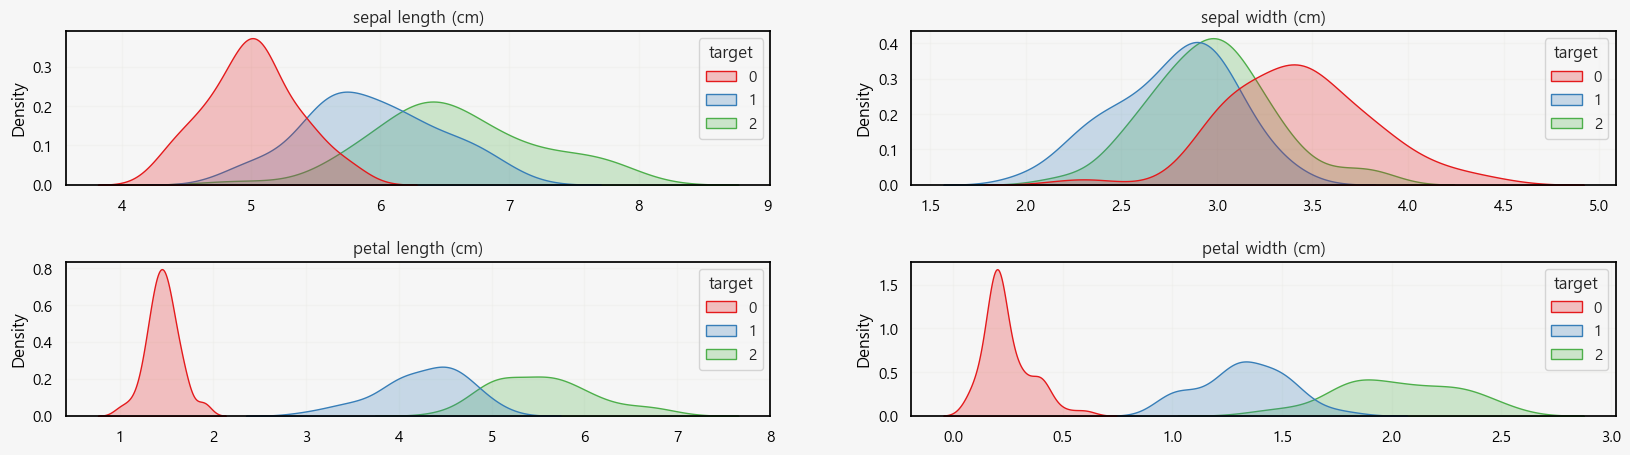

In [8]:
cols = df.columns[:-1]

fig,ax = plt.subplots(ncols = 2,nrows = 2 , figsize = (20,5))
ax = ax.flatten()

fig.subplots_adjust(hspace = 0.5)
for i,col in enumerate(cols):
    
    sns.kdeplot(data = df,
                x  = col,
                hue = 'target',
                fill = True,
                palette = 'Set1',
                ax = ax[i])
    ax[i].set_xlabel('')
    ax[i].set_title(col)
    

* skew (왜도)
    * 데이터 분포의 비대칭성을 측정
    * 완벽하게 대칭인 정규 분포의 경우 왜도가 0에 가까움
    * 왜도가 음수이면 왼쪽에 더 길거나 두꺼운 꼬리가 존재
    * 왜도가양수이면 오른쪽에 더 길거나 두꺼운 꼬리가 존재 

</br>

* kurtosis (첨도)
    * 첨도는 분포의 꼬리와 봉우리의 모양을 정량화
    * 완전 대칭 정규 분포의 경우에 약 첨도는 3 (초과 첨도 : 0 )
    * 첨도가 3 미만이면 정규분포에 비해 꼬리가 가늘고 첨두가 납작함을 나타냄
    * 첨도가 3보다 크면 정규분포에 비해 꼬리가 두껍고 피크가 더 뾰족함을 나타냄

In [9]:
print('Target : 0')
is_normal_distribution(df[df['target'] == 0].iloc[:,:-1])
print('Target : 1')
is_normal_distribution(df[df['target'] == 1].iloc[:,:-1])
print('Target : 2')
is_normal_distribution(df[df['target'] == 2].iloc[:,:-1])

Target : 0


,mean,std,skew,kurtosis,p_value
sepal length (cm),5.006,0.352490,0.120087,-0.252689,4.595011e-01
sepal width (cm),3.428,0.379064,0.041167,0.954703,2.715127e-01
petal length (cm),1.462,0.173664,0.106394,1.021576,5.481128e-02
petal width (cm),0.246,0.105386,1.253861,1.719130,8.658606e-07


Target : 1


,mean,std,skew,kurtosis,p_value
sepal length (cm),5.936,0.516171,0.105378,-0.533010,0.464738
sepal width (cm),2.770,0.313798,-0.362845,-0.366237,0.337984
petal length (cm),4.260,0.469911,-0.606508,0.047903,0.158476
petal width (cm),1.326,0.197753,-0.031180,-0.410059,0.027278


Target : 2


,mean,std,skew,kurtosis,p_value
sepal length (cm),6.588,0.635880,0.118015,0.032904,0.258313
sepal width (cm),2.974,0.322497,0.365949,0.706071,0.180899
petal length (cm),5.552,0.551895,0.549445,-0.153779,0.109775
petal width (cm),2.026,0.274650,-0.129477,-0.602264,0.086953


### **사실 원데이터는 완벽한 정규분포 형태라고는 볼 수 없다.**

    * P-value 는 샤피로 윌크 테스트 결과로 귀무가설이 해당 분포는 정규분포가 아니다인데 이를 기각하지 못할 정도로 P - value 가 크다.

Text(0.5, 1.1, '만약 모델을 만들게 된다면 모델은 target 별 평균과 분산을 이용해 \n 정규 분포를 그린 후 확률밀도함수값을 구해 사후확률을 예측 할 것이다')

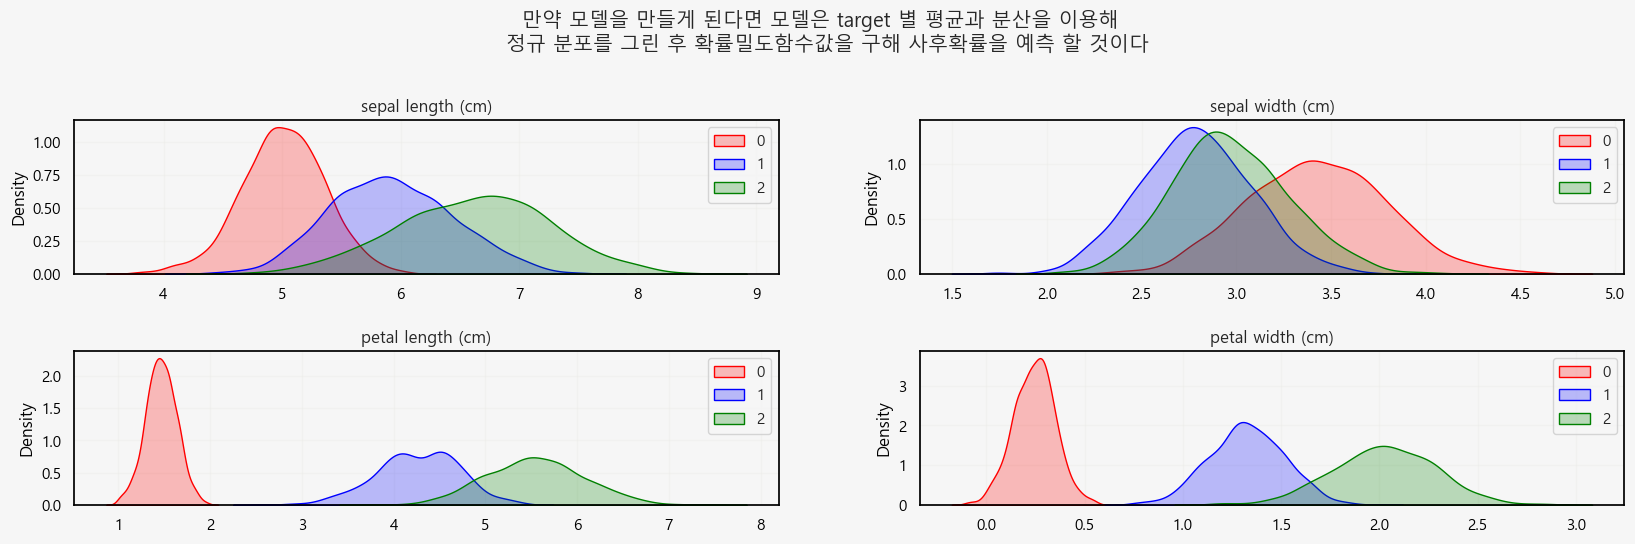

In [26]:
cols = df.columns[:-1]

fig,ax = plt.subplots(ncols = 2,nrows = 2 , figsize = (20,5))
ax = ax.flatten()

fig.subplots_adjust(hspace = 0.5)
colors = ['red','blue','green']
for i,col in enumerate(cols):
    for num,t in enumerate([0,1,2]):
        
        mean = np.mean(df.loc[df['target'] == t,col])
        std = np.std(df.loc[df['target'] == t, col])
        
        normal = np.random.normal(mean,std, size = 1000)
        
        sns.kdeplot(
            data = normal,
            color = colors[num],
            fill = True,
            label = t,
            ax = ax[i]
        )
    ax[i].legend(loc = 'upper right')
    ax[i].set_xlabel('')
    ax[i].set_title(col)    
    
fig.suptitle('만약 모델을 만들게 된다면 모델은 target 별 평균과 분산을 이용해 \n 정규 분포를 그린 후 확률밀도함수값을 구해 사후확률을 예측 할 것이다',
                y = 1.1)
    

In [35]:
class GaussianNB:
    
    def __init__(self):
        pass
        
    def fit(self,X,y):
        '''
        각 데이터별 초기 prior 값과 평균과 분산 저장 
        추후 정규분포 생성 후 우도를 계산할 때 사용됨
        '''
                
        self.n_classes = list(set(y))
        self.prior = {}
        self.means = {}
        self.vars = {}
        self.std = {}
                
        for c in self.n_classes:
            '''
            class 별 사전확률, means, variance 저장 
            '''    
            self.prior[c] = np.sum(y == c) / len(y)
            self.prior[c]
            
            X_c = X[y  == c]
            
            self.means[c] = np.mean(X_c,axis = 0)
            self.vars[c] = np.var(X_c,axis = 0)
            self.std[c] = np.std(X_c,axis = 0)
            

    def predict_proba(self,X):
        
        self.result = []
        
        for x in np.array(X): # 예측해야 하는 값들
            
            probability = []
            
            for c in self.n_classes: # class별 우도 측정 
                
                prior = self.prior[c]
                mean = self.means[c]
                var = self.vars[c]
                std =  self.std[c]
                
                # np.prod 는 각 배열에 있는 값을 꺼내어 연산 해줌 
                
                likelihood  = np.prod(
                    (1/ (std * np.sqrt(2*np.pi))) * np.exp(-((x - mean)**2)) / (2 * var)
                )

                probability.append(likelihood) # 전체 클래스에 대한 우도값 저장
                
            self.result.append(probability) # 정규화 하여 append
            
        # 확률 정규화 
        
        self.proba = np.array(self.result) / np.sum(self.result,axis = 1).reshape(-1,1)
        return self.proba 
        
        
    def predict(self,X):
        
        self.result = []
        
        for x in np.array(X): # 예측해야 하는 값들
            
            probability = []
            
            for c in self.n_classes: # class별 우도 측정 
                
                prior = self.prior[c]
                mean = self.means[c]
                var = self.vars[c]
                std =  self.std[c]
                
                # np.prod 는 각 배열에 있는 값을 꺼내어 연산 해줌 
                
                # 클래스 별 정규분포에서의 확률밀도함수값을 가지고 likelyhood 추정 
                
                likelihood  = np.prod(
                    (1/ (std * np.sqrt(2*np.pi))) * np.exp(-((x - mean)**2)) / (2 * var)
                )

                probability.append(prior * likelihood) # 전체 클래스에 대한 우도값 저장
                
            self.result.append(probability) # 정규화 하여 append
            
        # 확률 정규화 
        
        self.proba = np.array(self.result) / np.sum(self.result,axis = 1).reshape(-1,1)
        
        return np.argmax(self.proba, axis = 1)

### **가우시안NB 는 독립 변수가 정규분포를 따른다고 가정하기 때문에 클래스 별 정규 분포를 생성**

    * 이후 각 클래스 별 정규 분포 위에서 확률밀도함수값을 초기값과 곱해 Likelyhood 값으로 이용한다.

In [36]:
X,y = df.drop('target',axis = 1), df['target']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y)

In [70]:
gnb = GaussianNB()

gnb.fit(x_train,y_train)

In [71]:
gnb.means

{0: sepal length (cm)    5.0575
 sepal width (cm)     3.4800
 petal length (cm)    1.4475
 petal width (cm)     0.2475
 dtype: float64,
 1: sepal length (cm)    5.9900
 sepal width (cm)     2.7700
 petal length (cm)    4.3175
 petal width (cm)     1.3300
 dtype: float64,
 2: sepal length (cm)    6.5625
 sepal width (cm)     2.9700
 petal length (cm)    5.4975
 petal width (cm)     1.9925
 dtype: float64}

In [38]:
proba = gnb.predict_proba(x_test)
pred = gnb.predict(x_test)

In [40]:
print('예측 확률값')
print(proba[:5])

예측 확률값
[[4.23837795e-14 7.93931529e-03 9.92060685e-01]
 [6.14784396e-05 9.31702614e-01 6.82359072e-02]
 [9.99999807e-01 1.93223600e-07 2.26289662e-13]
 [9.99999965e-01 3.45306807e-08 1.99218282e-14]
 [2.01696002e-02 9.73851622e-01 5.97877799e-03]]


In [41]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Confusion Matrix')

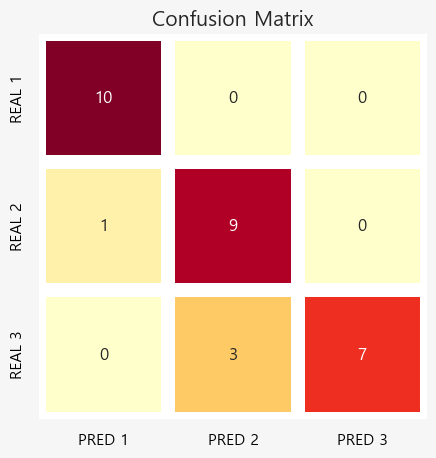

In [43]:
conf = pd.DataFrame(confusion_matrix(y_test,pred),
                index = ['REAL 1','REAL 2','REAL 3'],
                columns = ['PRED 1','PRED 2', 'PRED 3'])

plt.figure(figsize = (5,5))
sns.heatmap(conf,  annot = True, linewidths = 10, cmap = 'YlOrRd', cbar = False)
plt.title('Confusion Matrix', fontsize = 15)

* 예측이 쉬운 IRIS 데이터였음에도 불구하고 2개정도는 맞추지 못했다. 아무래도 원본 데이터가 완벽한 정규분포값이 아니다보니 그런 문제가 생긴듯 싶다.

In [69]:
A = np.array([1,2,3,4,5])
B = np.array([10,20,30,40,50])

np.prod(
    10*A + B // 2
)

91125000

In [68]:
11 // 2

5

In [62]:
result = 1

for a,b in zip(A,B):
    
    result *= 10*a + b // 2
    
result

91125000